# **Analisis Perubahan Iklim di Indonesia**

## **Pendahuluan**
Ini berfokus pada analisis data perubahan iklim di Indonesia. Dataset yang digunakan mencakup berbagai indikator seperti luas lahan pertanian. Dalam analisis ini, kita akan melalui beberapa tahap, mulai dari pembersihan data, eksplorasi data, visualisasi tren, hingga prediksi menggunakan model regresi linear.

## **Tujuan**
Tujuan dari analisis ini adalah:
1. Mengidentifikasi tren perubahan indikator iklim di Indonesia dari tahun ke tahun.
2. Melakukan prediksi nilai indikator tertentu (misalnya, luas lahan pertanian) di masa depan.
3. Menyajikan hasil analisis dalam bentuk visual yang mudah dipahami.

In [63]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [64]:
# Upload CSV file
uploaded = files.upload()

Saving climate-change_idn.csv to climate-change_idn (4).csv


In [65]:
# Mendapatkan nama file yang diunggah
file_name = list(uploaded.keys())[0]

In [66]:
# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_name)

In [67]:
# Menampilkan beberapa baris pertama untuk memastikan data berhasil dimuat
print("Data Awal:")
print(data.head())

Data Awal:
    Country Name   Country ISO3        Year              Indicator Name  \
0  #country+name  #country+code  #date+year             #indicator+name   
1      Indonesia            IDN        2021  Agricultural land (sq. km)   
2      Indonesia            IDN        2020  Agricultural land (sq. km)   
3      Indonesia            IDN        2019  Agricultural land (sq. km)   
4      Indonesia            IDN        2018  Agricultural land (sq. km)   

    Indicator Code                 Value  
0  #indicator+code  #indicator+value+num  
1   AG.LND.AGRI.K2                646000  
2   AG.LND.AGRI.K2                643000  
3   AG.LND.AGRI.K2                641000  
4   AG.LND.AGRI.K2                639000  


In [68]:
# Langkah 3: Menghapus baris pertama dan mengganti nama kolom
data = data.drop(0)  # Menghapus baris pertama
data.columns = ['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value']

In [69]:
# Mengonversi kolom Year dan Value menjadi tipe data numerik
data['Year'] = pd.to_numeric(data['Year'])
data['Value'] = pd.to_numeric(data['Value'])

In [70]:
# Menampilkan data yang telah dibersihkan
print("Data Setelah Pembersihan:")
print(data.head())

Data Setelah Pembersihan:
  Country Name Country ISO3  Year              Indicator Name  Indicator Code  \
1    Indonesia          IDN  2021  Agricultural land (sq. km)  AG.LND.AGRI.K2   
2    Indonesia          IDN  2020  Agricultural land (sq. km)  AG.LND.AGRI.K2   
3    Indonesia          IDN  2019  Agricultural land (sq. km)  AG.LND.AGRI.K2   
4    Indonesia          IDN  2018  Agricultural land (sq. km)  AG.LND.AGRI.K2   
5    Indonesia          IDN  2017  Agricultural land (sq. km)  AG.LND.AGRI.K2   

      Value  
1  646000.0  
2  643000.0  
3  641000.0  
4  639000.0  
5  633000.0  


In [71]:
#Menyaring data untuk indikator tertentu (contohnya luas lahan pertanian)
agri_land = data[data['Indicator Code'] == 'AG.LND.AGRI.K2']

In [72]:
# Langkah 6: Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(agri_land.describe())


Statistik Deskriptif:
              Year          Value
count    61.000000      61.000000
mean   1991.000000  459077.540984
std      17.752934   87023.008273
min    1961.000000  370520.000000
25%    1976.000000  384000.000000
50%    1991.000000  429680.000000
75%    2006.000000  532600.000000
max    2021.000000  646000.000000


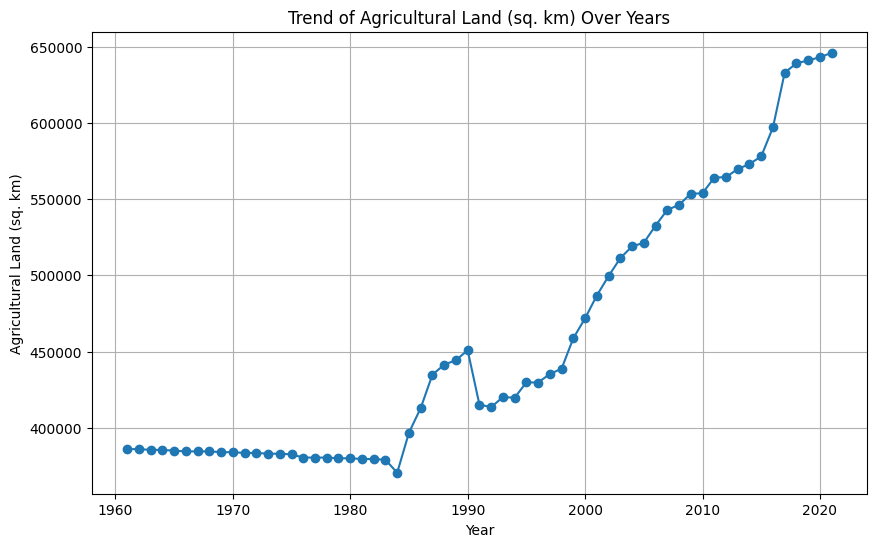

In [73]:
# Membuat grafik tren perubahan luas lahan pertanian
plt.figure(figsize=(10, 6))
plt.plot(agri_land['Year'], agri_land['Value'], marker='o')
plt.title('Trend of Agricultural Land (sq. km) Over Years')
plt.xlabel('Year')
plt.ylabel('Agricultural Land (sq. km)')
plt.grid(True)
plt.show()

In [74]:
# Mempersiapkan data untuk model prediksi
X = agri_land[['Year']]  # Fitur (independent variable)
y = agri_land['Value']  # Target (dependent variable)


In [75]:
# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [76]:
# Memprediksi nilai di masa depan
future_years = np.array([[2022], [2023], [2024], [2025]])
predictions = model.predict(future_years)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
# Menampilkan prediksi
print("\nPrediksi untuk Tahun Mendatang:")
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Tahun: {year}, Prediksi Luas Lahan Pertanian: {prediction:.2f} sq. km")


Prediksi untuk Tahun Mendatang:
Tahun: 2022, Prediksi Luas Lahan Pertanian: 598796.85 sq. km
Tahun: 2023, Prediksi Luas Lahan Pertanian: 603303.93 sq. km
Tahun: 2024, Prediksi Luas Lahan Pertanian: 607811.00 sq. km
Tahun: 2025, Prediksi Luas Lahan Pertanian: 612318.08 sq. km


## **Kesimpulan**
Dalam analisis ini, kita telah melihat bagaimana data terkait perubahan iklim, khususnya luas lahan pertanian di Indonesia, dapat dianalisis untuk memberikan wawasan yang lebih dalam. Prediksi yang dihasilkan dapat digunakan untuk memahami potensi perubahan di masa depan dan mempersiapkan langkah-langkah yang diperlukan.